<a href="https://colab.research.google.com/github/SWLee1212/KAIST-ML-Advanced-courses/blob/master/1_2_%EB%8B%A8%EC%88%9C_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B5%AC%EB%AA%A8%EB%8D%B8_%EA%B5%AC%ED%98%84%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> beta_0 :  [2.89804615]
> beta_1 :  [[2.90298892]]
> 모델 평가 점수 : 0.8948735905242707


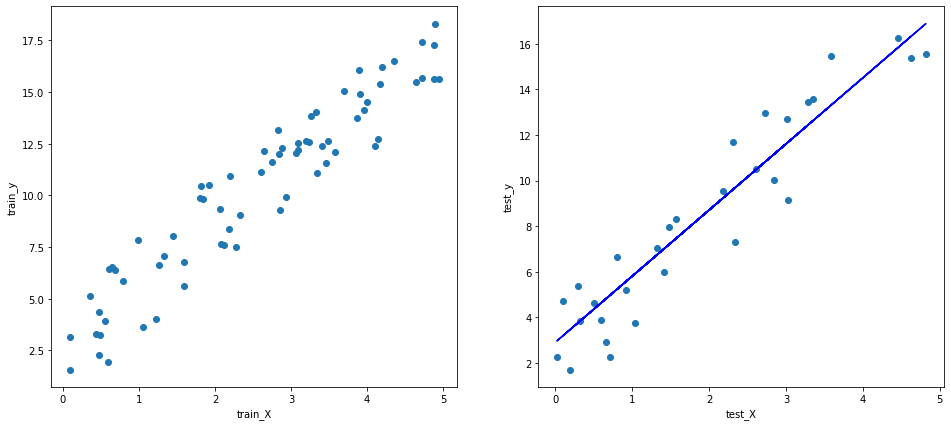

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# from elice_utils import EliceUtils
# elice_utils = EliceUtils()

# 데이터를 분리하는 모듈을 불러옵니다.
from sklearn.model_selection import train_test_split

# 사이킷런에 구현되어 있는 회귀 모델을 불러옵니다.
from sklearn.linear_model import LinearRegression

"""
1. 데이터를 생성하고, 
   생성한 데이터를 
   학습용 데이터와 테스트용 데이터로 분리하여 
   반환하는 함수를 구현합니다.
   
   학습용 데이터로 전체 데이터의 70%를 사용하고, 
   테스트용 데이터로 나머지 30%를 사용합니다.
   
   동일한 결과 확인을 위하여 random_state를 0으로 설정합니다.
"""
def load_data():
    
    np.random.seed(0)
    
    X = 5*np.random.rand(100,1)
    y = 3*X + 5*np.random.rand(100,1)
    
    train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 0.3, random_state=0)
    
    return train_X, test_X, train_y, test_y

"""
2. 단순 선형회귀 모델을 불러오고, 
   불러온 모델을 학습용 데이터에 
   맞추어 학습시킨 후
   테스트 데이터에 대한 
   예측값을 반환하는 함수를 구현합니다.

   Step01. 사이킷런에 구현되어 있는 
           단순 선형회귀 모델을 불러옵니다.

   Step02. 불러온 모델을 
           학습용 데이터에 맞춰 학습시킵니다.
"""
def regression_model(train_X, train_y):
    
    simplelinear = LinearRegression()
    
    simplelinear.fit(train_X, train_y)
    
    return simplelinear
    
# 그래프를 시각화하는 함수입니다.
def plotting_graph(train_X, test_X, train_y, test_y, predicted):
    fig, ax = plt.subplots(1,2, figsize=(16, 7))
    
    ax[0].scatter(train_X,train_y)
    ax[1].scatter(test_X,test_y)
    ax[1].plot(test_X, predicted, color='b')
    
    ax[0].set_xlabel('train_X')
    ax[0].set_ylabel('train_y')
    ax[1].set_xlabel('test_X')
    ax[1].set_ylabel('test_y')
    
    fig.savefig("result.png")
    fig.show()
    # elice_utils.send_image("result.png")
    
"""
3. 모델 학습 및 예측 결과 확인을 위한 
   main() 함수를 완성합니다.
   
   Step01. 학습이 완료된 모델을 활용하여 
           테스트 데이터에 대한 예측을 수행합니다.
        
   Step02. 사이킷런 회귀 모델 내에 구현되어 있는 
           score 함수를 사용하여 
           모델 학습 평가 점수를 model_score 변수에
           저장합니다. 
   
   Step03. 학습된 모델의 beta_0와 beta_1을 
           각각 변수 beta_0와 beta_1에 
           저장합니다.
"""
def main():
    
    train_X, test_X, train_y, test_y = load_data()
    
    simplelinear = regression_model(train_X, train_y)
    
    predicted = simplelinear.predict(test_X)
    
    model_score = simplelinear.score(test_X, test_y)
    
    beta_0 = simplelinear.intercept_
    beta_1 = simplelinear.coef_
    
    print("> beta_0 : ",beta_0)
    print("> beta_1 : ",beta_1)
    
    print("> 모델 평가 점수 :", model_score)
    
    # 시각화 함수 호출하기
    plotting_graph(train_X, test_X, train_y, test_y, predicted)
    
    return predicted, beta_0, beta_1, model_score
    
    
if __name__=="__main__":
    main()